In [1]:
import sys
from collections import namedtuple
import numpy as np
from uncertainties import ufloat, unumpy
import uncertainties
import scipy
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

sys.path.append("..")

from hists.parameters import beamEnergies
from hist_loader import HistLoader
from sigma_over_e import SigmaOverEComputations, fitSigmaOverE, SigmaOverEPlotElement, plotSigmaOverMean, sigmaOverE_fitFunction, plotSCAsEllipse
from ntupleReaders.clue_ntuple_reader import ClueNtupleReader
#from fit import HistogramEstimates

/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis/lib/python3.10/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
reader = ClueNtupleReader("v40", "cmssw", "data") # sim_proton_v46_patchMIP
loader = HistLoader(reader.histStore)

In [3]:
comp_sigma_e = SigmaOverEComputations(sigmaWindow=(1, 2.5))

In [4]:
sigma_e_results = comp_sigma_e.compute({beamEnergy : loader.getRechitsProjected(reader.datatype, beamEnergy) for beamEnergy in beamEnergies}, multithread=False)

Fitting:   0%|          | 0/10 [00:00<?, ?it/s]

Iterative fitting - 20 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 29 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 50 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 80 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 101 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 121 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 151 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 200 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 246 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

Iterative fitting - 289 GeV:   0%|          | 0/5 [00:00<?, ?it/s]

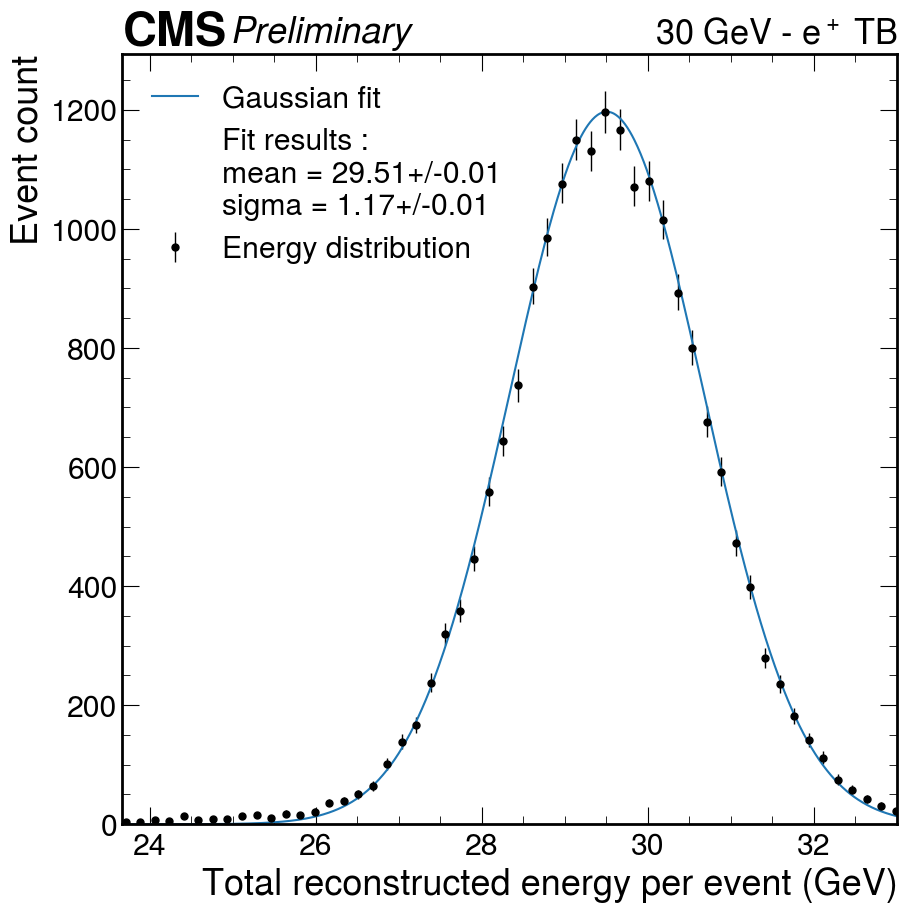

In [5]:
comp_sigma_e.plotFitResult(30)

In [6]:
sigma_e_results

{20: SigmaMuResult(mu=19.640632104278215+/-0.012204959165682169, sigma=0.9521271985973383+/-0.010711188164569934, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7fc07c55b0a0>),
 30: SigmaMuResult(mu=29.506922196425577+/-0.014684453286080288, sigma=1.1669665627878125+/-0.012435379764854726, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7fc07c5a2ec0>),
 50: SigmaMuResult(mu=49.85499658080433+/-0.012005842198394243, sigma=1.5730782157845042+/-0.010021809690361401, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7fc0842c9630>),
 80: SigmaMuResult(mu=80.34005533194767+/-0.017990081882936614, sigma=2.0450047866650887+/-0.01461954898020708, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7fc07c1ff3d0>),
 100: SigmaMuResult(mu=100.75503369957407+/-0.02720021799571416, sigma=2.3583637466369987+/-0.02202491899042253, fitResult=<zfit.minimizers.fitresult.FitResult object at 0x7fc07c3a0040>),
 120: SigmaMuResult(mu=121.21016043726658+/-0.0316554878665

In [7]:
fitSigmaOverE(sigma_e_results)

EResolutionFitResult(S=0.22002068561122662+/-0.0012954535797259522, C=0.005022633199863942+/-0.0004988920360956699)

In [8]:
plotElt = SigmaOverEPlotElement("Rechits " + "data" if reader.datatype == "data" else "simulation", fitSigmaOverE(sigma_e_results), sigmaOverE_fitFunction, {beamEnergy : result.sigma / result.mu for beamEnergy, result in sigma_e_results.items()}, None, None)

In [10]:
import pickle
import os
os.makedirs(os.path.join(reader.pathToFolder, "sigmaOverE"), exist_ok=True)
with open(os.path.join(reader.pathToFolder, "sigmaOverE", "rechits.pickle"), 'wb') as f:
    pickle.dump(plotElt, f)

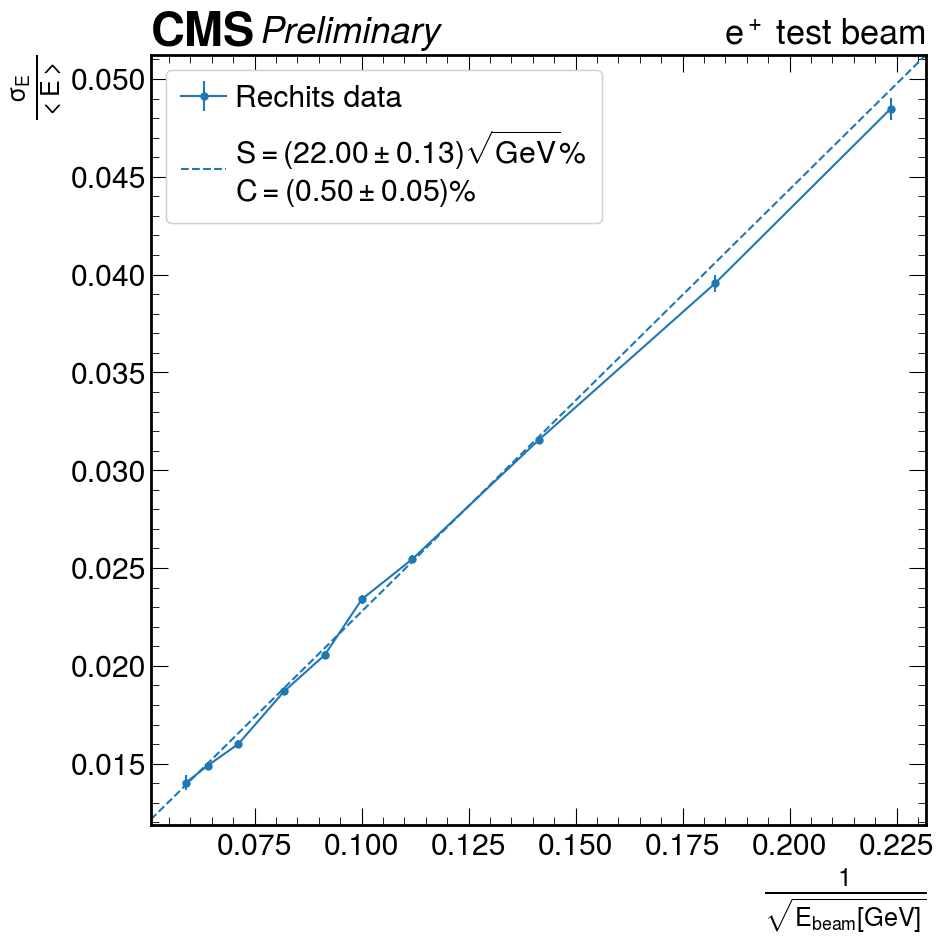

In [11]:
plotSigmaOverMean([plotElt], xMode="1/sqrt(E)", plotFit=True)

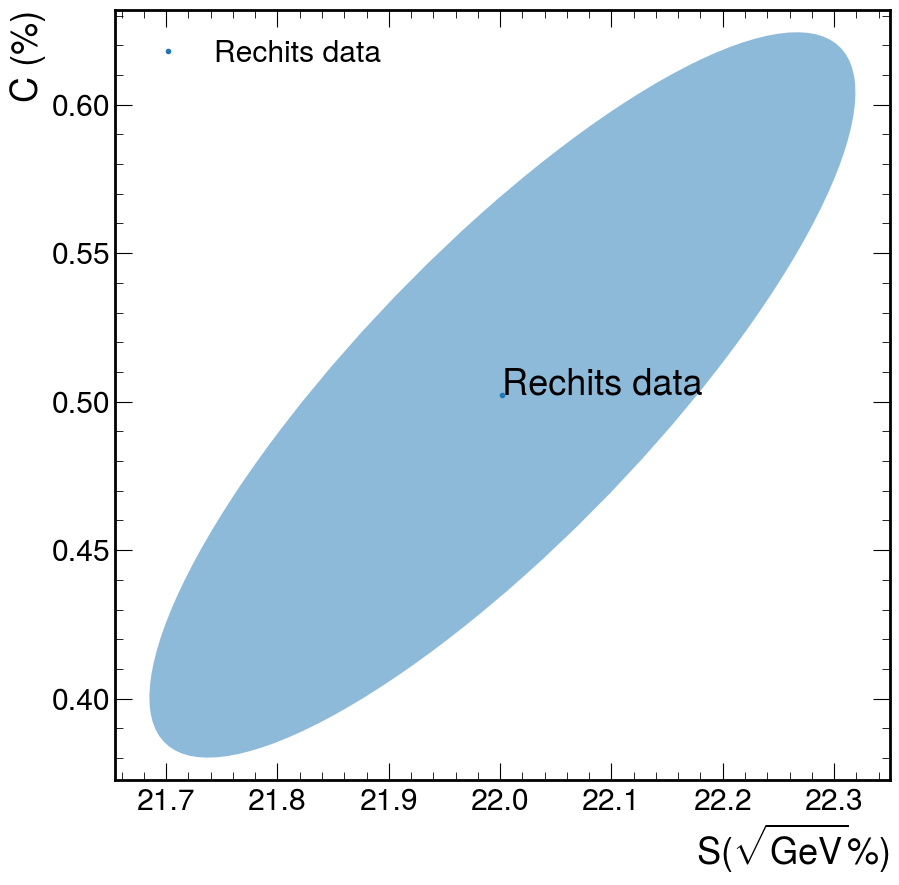

In [12]:
plotSCAsEllipse([plotElt])